# SGD and Backpropagation Visual Tutorial
## A comprehensive guide with visual explanations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from matplotlib.animation import FuncAnimation
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📚 SGD and Backpropagation Visual Tutorial")
print("=" * 50)
print("This notebook covers:")
print("1. Partial Derivatives Refresher")
print("2. Gradient Descent Visualization")
print("3. Simple Neural Network Forward Pass")
print("4. Backpropagation Step by Step")
print("5. SGD Implementation")
print("6. Complete Training Loop")

📚 SGD and Backpropagation Visual Tutorial
This notebook covers:
1. Partial Derivatives Refresher
2. Gradient Descent Visualization
3. Simple Neural Network Forward Pass
4. Backpropagation Step by Step
5. SGD Implementation
6. Complete Training Loop


## 🧮 PART 1: PARTIAL DERIVATIVES REFRESHER
***

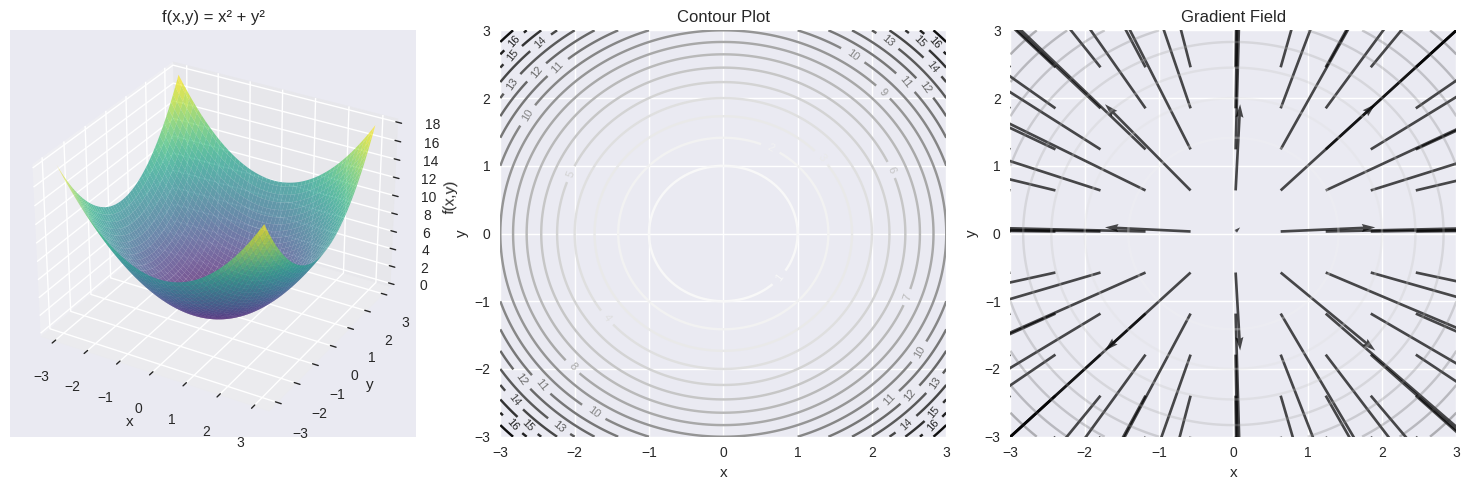

In [2]:
# Let's start with a simple function f(x,y) = x² + y²
def simple_function(x, y):
    return x**2 + y**2

# Create a grid of points
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = simple_function(X, Y)

# Plot the function
fig = plt.figure(figsize=(15, 5))

# 3D surface plot
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)
ax1.set_title('f(x,y) = x² + y²')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x,y)')

# Contour plot
ax2 = fig.add_subplot(132)
contour = ax2.contour(X, Y, Z, levels=20)
ax2.clabel(contour, inline=True, fontsize=8)
ax2.set_title('Contour Plot')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

# Gradient visualization
ax3 = fig.add_subplot(133)
# Calculate gradients (partial derivatives)
dx = 2 * X  # ∂f/∂x = 2x
dy = 2 * Y  # ∂f/∂y = 2y

# Plot gradient field (every 10th point for clarity)
skip = 10
ax3.quiver(X[::skip, ::skip], Y[::skip, ::skip],
           dx[::skip, ::skip], dy[::skip, ::skip],
           angles='xy', scale_units='xy', scale=1, alpha=0.7)
ax3.contour(X, Y, Z, levels=10, alpha=0.3)
ax3.set_title('Gradient Field')
ax3.set_xlabel('x')
ax3.set_ylabel('y')

plt.tight_layout()
plt.show()

📖 Partial Derivatives Explained:
For $f(x,y) = x^2 + y^2$:
• $∂f/∂x = 2x$ (derivative with respect to x, treating y as constant)
• $∂f/∂y = 2y$ (derivative with respect to y, treating x as constant)
• The gradient $∇f = (∂f/∂x, ∂f/∂y) = (2x, 2y)$
• Gradient points in direction of steepest increase
• For minimization, we go in the OPPOSITE direction: $-∇f$

## 🎯 PART 2: GRADIENT DESCENT VISUALIZATION
***

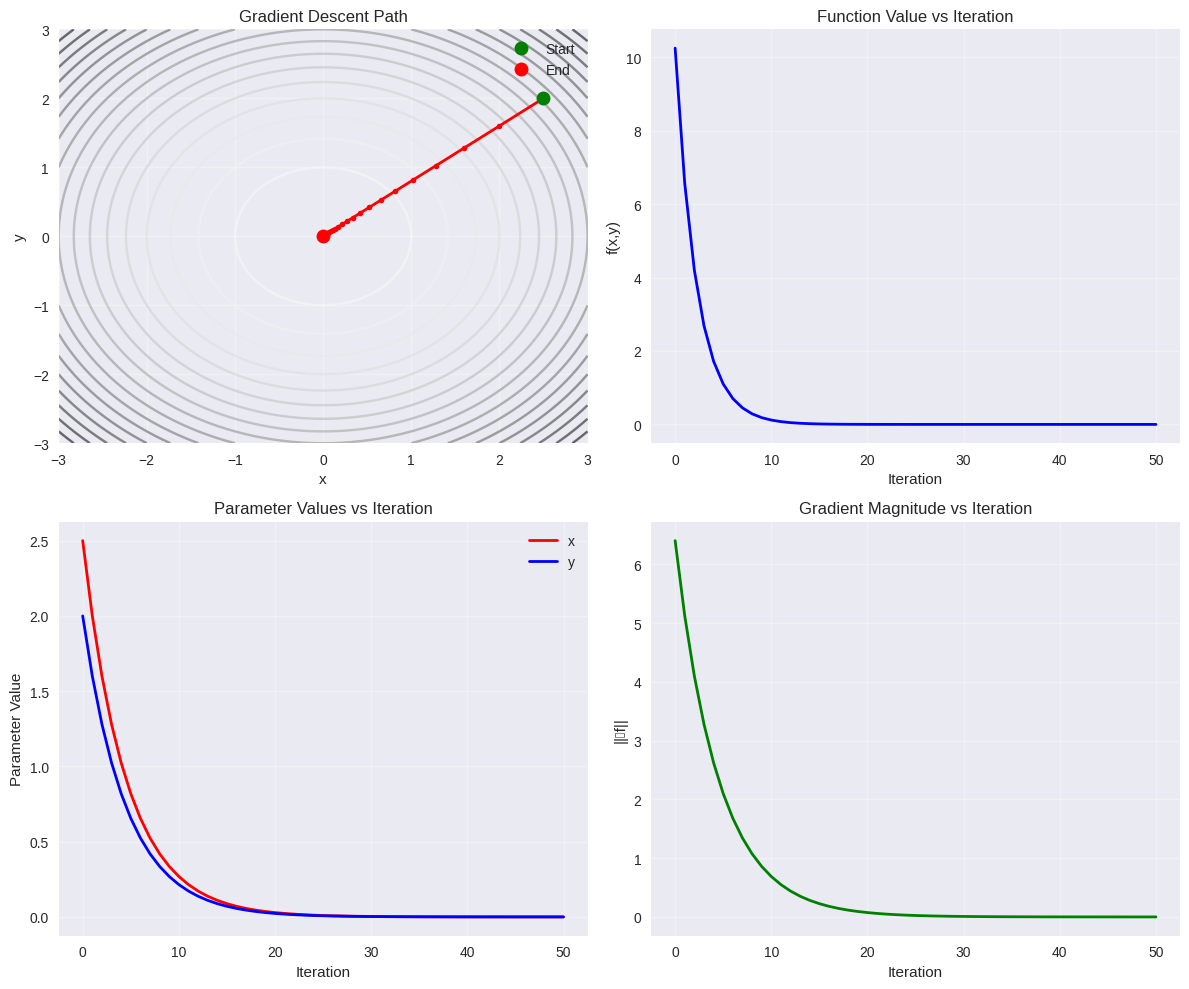

In [3]:
def gradient_descent_demo():
    # Starting point
    x_start, y_start = 2.5, 2.0
    learning_rate = 0.1
    num_steps = 50

    # Store path
    path_x = [x_start]
    path_y = [y_start]

    x, y = x_start, y_start

    for i in range(num_steps):
        # Calculate gradients
        grad_x = 2 * x  # ∂f/∂x
        grad_y = 2 * y  # ∂f/∂y

        # Update parameters (move opposite to gradient)
        x = x - learning_rate * grad_x
        y = y - learning_rate * grad_y

        path_x.append(x)
        path_y.append(y)

    return path_x, path_y

# Run gradient descent
path_x, path_y = gradient_descent_demo()

# Visualize the path
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))

# Plot 1: Contour with path
x_grid = np.linspace(-3, 3, 100)
y_grid = np.linspace(-3, 3, 100)
X_grid, Y_grid = np.meshgrid(x_grid, y_grid)
Z_grid = simple_function(X_grid, Y_grid)

ax1.contour(X_grid, Y_grid, Z_grid, levels=20, alpha=0.6)
ax1.plot(path_x, path_y, 'ro-', linewidth=2, markersize=4)
ax1.plot(path_x[0], path_y[0], 'go', markersize=10, label='Start')
ax1.plot(path_x[-1], path_y[-1], 'ro', markersize=10, label='End')
ax1.set_title('Gradient Descent Path')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Function value over iterations
function_values = [simple_function(x, y) for x, y in zip(path_x, path_y)]
ax2.plot(function_values, 'b-', linewidth=2)
ax2.set_title('Function Value vs Iteration')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('f(x,y)')
ax2.grid(True, alpha=0.3)

# Plot 3: Parameter values over time
ax3.plot(path_x, 'r-', linewidth=2, label='x')
ax3.plot(path_y, 'b-', linewidth=2, label='y')
ax3.set_title('Parameter Values vs Iteration')
ax3.set_xlabel('Iteration')
ax3.set_ylabel('Parameter Value')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot 4: Gradient magnitude
grad_magnitudes = [np.sqrt((2*x)**2 + (2*y)**2) for x, y in zip(path_x, path_y)]
ax4.plot(grad_magnitudes, 'g-', linewidth=2)
ax4.set_title('Gradient Magnitude vs Iteration')
ax4.set_xlabel('Iteration')
ax4.set_ylabel('||∇f||')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

🔍 Key Observations:
• The algorithm converges to the minimum at (0,0)
• Function value decreases monotonically
• Parameters approach zero
• Gradient magnitude decreases (getting closer to flat region)

## 🧠 PART 3: SIMPLE NEURAL NETWORK FORWARD PASS
***

🏗️ Network Architecture:
Input Layer: 2 neurons
Hidden Layer: 2 neurons (sigmoid activation)
Output Layer: 1 neuron (sigmoid activation)

Initial Weights:
W1 (input->hidden):
[[ 0.24835708 -0.06913215]
 [ 0.32384427  0.76151493]]
b1 (hidden bias): [[0. 0.]]
W2 (hidden->output):
[[-0.11707669]
 [-0.11706848]]
b2 (output bias): [[0.]]

Forward Pass:
Input: [[0.5 0.3]]
Hidden layer pre-activation (z1): [[0.22133182 0.1938884 ]]
Hidden layer post-activation (a1): [[0.55510817 0.54832082]]
Output layer pre-activation (z2): [[-0.12918131]]
Final output (a2): [[0.46774951]]
Target: [[0.8]]


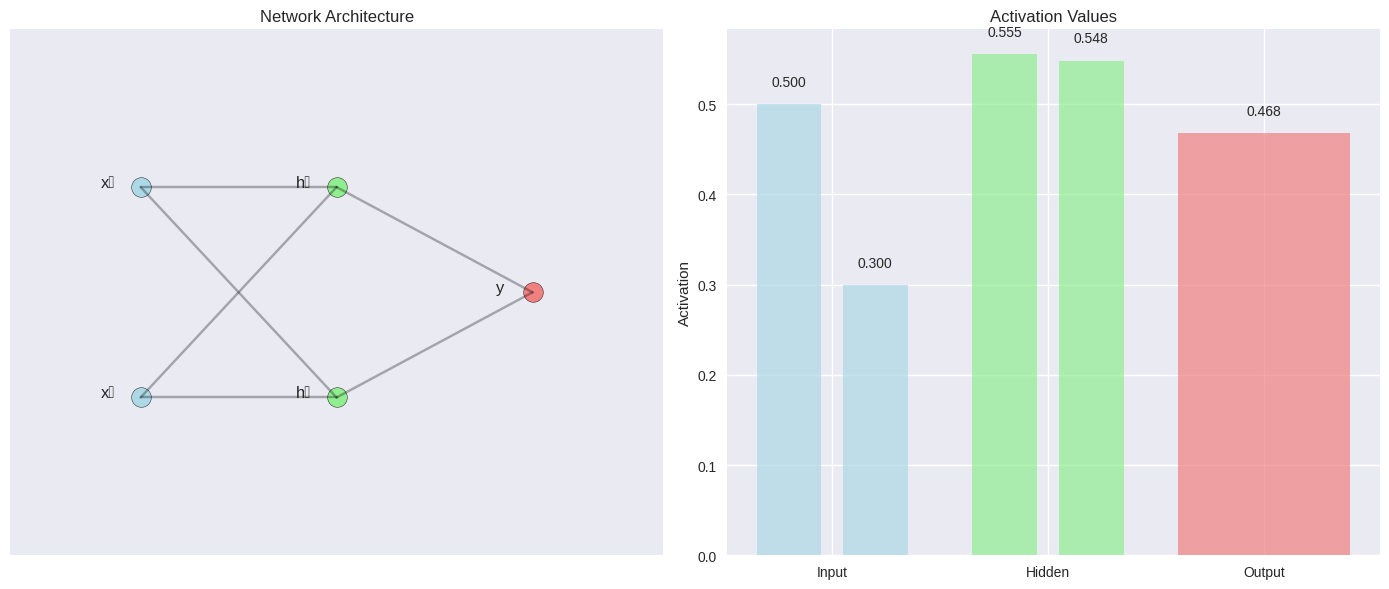

In [4]:
class SimpleNeuralNetwork:
    def __init__(self):
        # Network: 2 inputs -> 2 hidden -> 1 output
        # Initialize weights randomly
        np.random.seed(42)
        self.W1 = np.random.randn(2, 2) * 0.5  # Input to hidden
        self.b1 = np.zeros((1, 2))             # Hidden bias
        self.W2 = np.random.randn(2, 1) * 0.5  # Hidden to output
        self.b2 = np.zeros((1, 1))             # Output bias

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-np.clip(x, -500, 500)))

    def forward(self, X):
        # Store intermediate values for backpropagation
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)
        return self.a2

# Create network and sample data
nn = SimpleNeuralNetwork()
X_sample = np.array([[0.5, 0.3]])
y_sample = np.array([[0.8]])

print("🏗️ Network Architecture:")
print("Input Layer: 2 neurons")
print("Hidden Layer: 2 neurons (sigmoid activation)")
print("Output Layer: 1 neuron (sigmoid activation)")
print("\nInitial Weights:")
print(f"W1 (input->hidden):\n{nn.W1}")
print(f"b1 (hidden bias): {nn.b1}")
print(f"W2 (hidden->output):\n{nn.W2}")
print(f"b2 (output bias): {nn.b2}")

# Forward pass
output = nn.forward(X_sample)
print(f"\nForward Pass:")
print(f"Input: {X_sample}")
print(f"Hidden layer pre-activation (z1): {nn.z1}")
print(f"Hidden layer post-activation (a1): {nn.a1}")
print(f"Output layer pre-activation (z2): {nn.z2}")
print(f"Final output (a2): {output}")
print(f"Target: {y_sample}")

# Visualize the network
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Network diagram
ax1.set_xlim(0, 10)
ax1.set_ylim(0, 10)

# Input layer
ax1.scatter([2, 2], [7, 3], s=200, c='lightblue', edgecolors='black')
ax1.text(1.5, 7, 'x₁', fontsize=12, ha='center')
ax1.text(1.5, 3, 'x₂', fontsize=12, ha='center')

# Hidden layer
ax1.scatter([5, 5], [7, 3], s=200, c='lightgreen', edgecolors='black')
ax1.text(4.5, 7, 'h₁', fontsize=12, ha='center')
ax1.text(4.5, 3, 'h₂', fontsize=12, ha='center')

# Output layer
ax1.scatter([8], [5], s=200, c='lightcoral', edgecolors='black')
ax1.text(7.5, 5, 'y', fontsize=12, ha='center')

# Connections
connections = [
    ((2, 7), (5, 7)), ((2, 7), (5, 3)),
    ((2, 3), (5, 7)), ((2, 3), (5, 3)),
    ((5, 7), (8, 5)), ((5, 3), (8, 5))
]

for start, end in connections:
    ax1.plot([start[0], end[0]], [start[1], end[1]], 'k-', alpha=0.3)

ax1.set_title('Network Architecture')
ax1.set_xticks([])
ax1.set_yticks([])

# Activation visualization
layers = ['Input', 'Hidden', 'Output']
values = [X_sample[0], nn.a1[0], output[0]]

for i, (layer, vals) in enumerate(zip(layers, values)):
    if len(vals) == 1:
        ax2.bar([i], vals, color=['lightblue', 'lightgreen', 'lightcoral'][i], alpha=0.7)
        ax2.text(i, vals[0] + 0.02, f'{vals[0]:.3f}', ha='center')
    else:
        for j, val in enumerate(vals):
            ax2.bar([i - 0.2 + j * 0.4], [val],
                   color=['lightblue', 'lightgreen', 'lightcoral'][i],
                   alpha=0.7, width=0.3)
            ax2.text(i - 0.2 + j * 0.4, val + 0.02, f'{val:.3f}', ha='center')

ax2.set_title('Activation Values')
ax2.set_xticks(range(len(layers)))
ax2.set_xticklabels(layers)
ax2.set_ylabel('Activation')

plt.tight_layout()
plt.show()

## 🔄 PART 4: BACKPROPAGATION STEP BY STEP
***

🔍 Backpropagation Breakdown:
Loss: 0.055195

Gradients:
dL_dW2: [[-0.04591691]
 [-0.04535548]]
dL_db2: [[-0.08271705]]
dL_dW1: [[0.00119582 0.00119914]
 [0.00071749 0.00071948]]
dL_db1: [[0.00239165 0.00239828]]
dL_da2: [[-0.33225049]]
dL_dz2: [[-0.08271705]]
dL_da1: [[0.00968424 0.00968356]]
dL_dz1: [[0.00239165 0.00239828]]


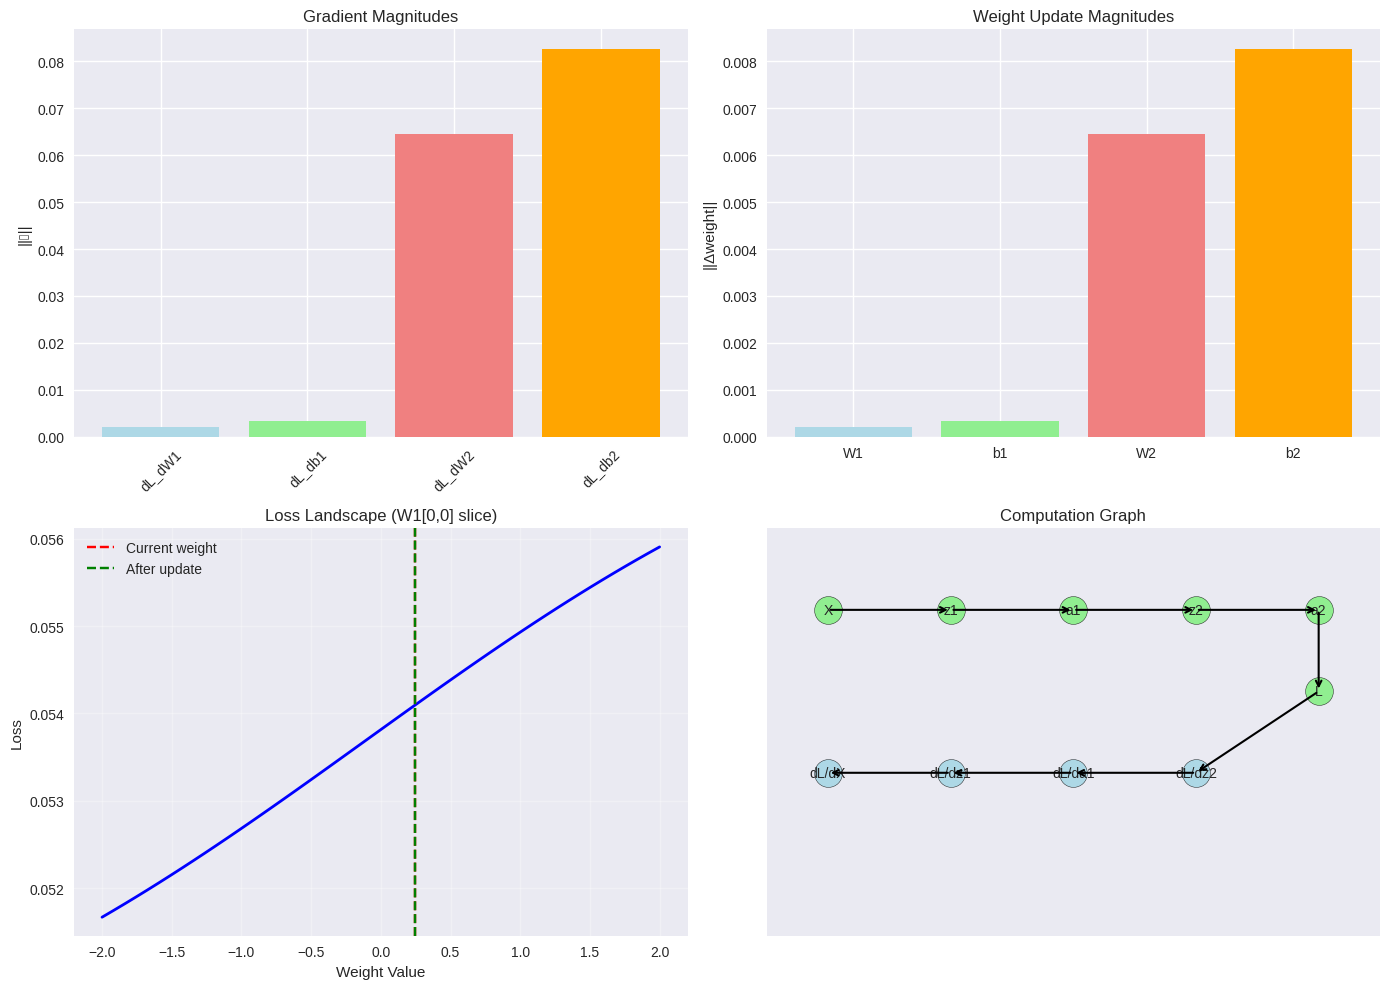

In [5]:
class BackpropNetwork(SimpleNeuralNetwork):
    def __init__(self):
        super().__init__()

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def backward(self, X, y, learning_rate=0.1):
        m = X.shape[0]

        # Forward pass (already done, but for completeness)
        output = self.forward(X)

        # Calculate loss
        loss = 0.5 * np.mean((y - output)**2)

        # Backward pass
        # Output layer gradients
        dL_da2 = -(y - output) / m  # Derivative of loss w.r.t. output
        da2_dz2 = self.sigmoid_derivative(self.a2)  # Derivative of sigmoid
        dL_dz2 = dL_da2 * da2_dz2

        # Gradients for W2 and b2
        dL_dW2 = np.dot(self.a1.T, dL_dz2)
        dL_db2 = np.sum(dL_dz2, axis=0, keepdims=True)

        # Hidden layer gradients
        dL_da1 = np.dot(dL_dz2, self.W2.T)
        da1_dz1 = self.sigmoid_derivative(self.a1)
        dL_dz1 = dL_da1 * da1_dz1

        # Gradients for W1 and b1
        dL_dW1 = np.dot(X.T, dL_dz1)
        dL_db1 = np.sum(dL_dz1, axis=0, keepdims=True)

        # Store gradients for visualization
        self.gradients = {
            'dL_dW2': dL_dW2, 'dL_db2': dL_db2,
            'dL_dW1': dL_dW1, 'dL_db1': dL_db1,
            'dL_da2': dL_da2, 'dL_dz2': dL_dz2,
            'dL_da1': dL_da1, 'dL_dz1': dL_dz1
        }

        # Update weights
        self.W2 -= learning_rate * dL_dW2
        self.b2 -= learning_rate * dL_db2
        self.W1 -= learning_rate * dL_dW1
        self.b1 -= learning_rate * dL_db1

        return loss

# Create network and run one backprop step
bp_nn = BackpropNetwork()
loss = bp_nn.backward(X_sample, y_sample)

print("🔍 Backpropagation Breakdown:")
print(f"Loss: {loss:.6f}")
print("\nGradients:")
for name, grad in bp_nn.gradients.items():
    print(f"{name}: {grad}")

# Visualize gradient flow
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# Gradient magnitudes
grad_names = ['dL_dW1', 'dL_db1', 'dL_dW2', 'dL_db2']
grad_mags = [np.linalg.norm(bp_nn.gradients[name]) for name in grad_names]

ax1.bar(grad_names, grad_mags, color=['lightblue', 'lightgreen', 'lightcoral', 'orange'])
ax1.set_title('Gradient Magnitudes')
ax1.set_ylabel('||∇||')
ax1.tick_params(axis='x', rotation=45)

# Weight updates visualization
weight_names = ['W1', 'b1', 'W2', 'b2']
gradient_keys = ['dL_dW1', 'dL_db1', 'dL_dW2', 'dL_db2']
weight_changes = [np.linalg.norm(0.1 * bp_nn.gradients[key]) for key in gradient_keys]

# weight_names = ['W1', 'b1', 'W2', 'b2']
# weight_changes = [np.linalg.norm(0.1 * bp_nn.gradients[f'dL_{name}']) for name in weight_names]

ax2.bar(weight_names, weight_changes, color=['lightblue', 'lightgreen', 'lightcoral', 'orange'])
ax2.set_title('Weight Update Magnitudes')
ax2.set_ylabel('||Δweight||')

# Loss landscape (simplified 2D slice)
w_range = np.linspace(-2, 2, 50)
losses = []
original_w = bp_nn.W1[0, 0]

for w in w_range:
    bp_nn.W1[0, 0] = w
    output = bp_nn.forward(X_sample)
    loss = 0.5 * np.mean((y_sample - output)**2)
    losses.append(loss)

bp_nn.W1[0, 0] = original_w  # Restore original weight

ax3.plot(w_range, losses, 'b-', linewidth=2)
ax3.axvline(x=original_w, color='r', linestyle='--', label='Current weight')
ax3.axvline(x=original_w - 0.1 * bp_nn.gradients['dL_dW1'][0, 0],
           color='g', linestyle='--', label='After update')
ax3.set_title('Loss Landscape (W1[0,0] slice)')
ax3.set_xlabel('Weight Value')
ax3.set_ylabel('Loss')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Computation graph
ax4.set_xlim(0, 10)
ax4.set_ylim(0, 10)

# Nodes
nodes = [
    (1, 8, 'X'), (3, 8, 'z1'), (5, 8, 'a1'), (7, 8, 'z2'), (9, 8, 'a2'),
    (9, 6, 'L'), (7, 4, 'dL/dz2'), (5, 4, 'dL/da1'), (3, 4, 'dL/dz1'), (1, 4, 'dL/dX')
]

for x, y, label in nodes:
    color = 'lightblue' if 'dL' in label else 'lightgreen'
    ax4.scatter(x, y, s=400, c=color, edgecolors='black')
    ax4.text(x, y, label, fontsize=10, ha='center', va='center')

# Arrows
arrows = [
    ((1, 8), (3, 8)), ((3, 8), (5, 8)), ((5, 8), (7, 8)), ((7, 8), (9, 8)),
    ((9, 8), (9, 6)), ((9, 6), (7, 4)), ((7, 4), (5, 4)), ((5, 4), (3, 4)), ((3, 4), (1, 4))
]

for start, end in arrows:
    ax4.annotate('', xy=end, xytext=start,
                arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

ax4.set_title('Computation Graph')
ax4.set_xticks([])
ax4.set_yticks([])

plt.tight_layout()
plt.show()

📝 Key Backpropagation Concepts:
• Chain Rule: $dL/dw = dL/da × da/dz × dz/dw$
• Gradients flow backward through the network
• Each layer's gradient depends on the gradient from the next layer
• Weights are updated in the direction that reduces loss

## 🎲 PART 5: STOCHASTIC GRADIENT DESCENT (SGD)
***

Dataset: 100 samples
Input shape: (100, 2)
Output shape: (100, 1)


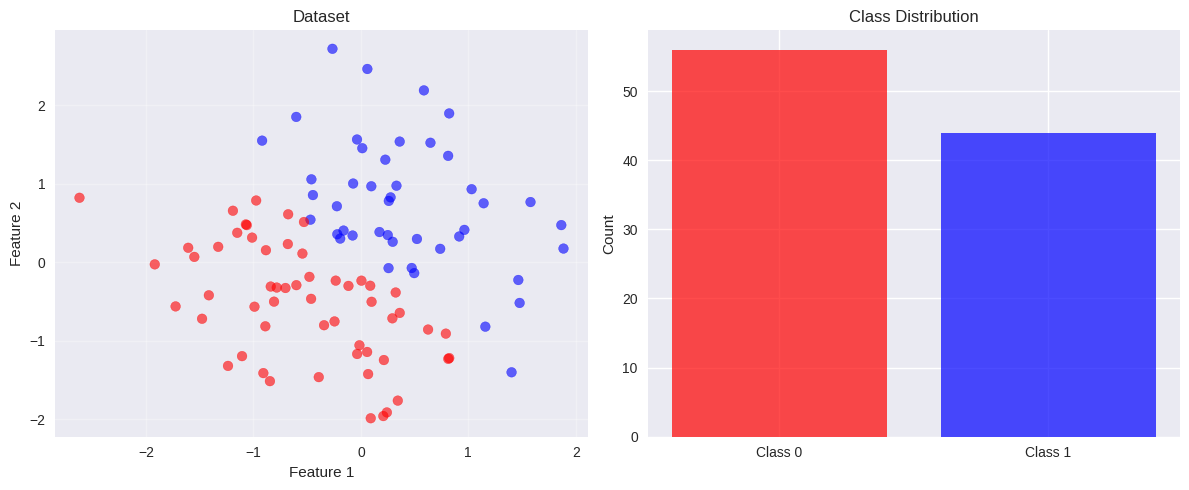

In [6]:
# Generate a simple dataset
np.random.seed(42)
n_samples = 100
X_data = np.random.randn(n_samples, 2)
y_data = (X_data[:, 0] + X_data[:, 1] > 0).astype(int).reshape(-1, 1)

print(f"Dataset: {n_samples} samples")
print(f"Input shape: {X_data.shape}")
print(f"Output shape: {y_data.shape}")

# Visualize the dataset
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot of data
colors = ['red' if y == 0 else 'blue' for y in y_data.flatten()]
ax1.scatter(X_data[:, 0], X_data[:, 1], c=colors, alpha=0.6)
ax1.set_title('Dataset')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.grid(True, alpha=0.3)

# Class distribution
unique, counts = np.unique(y_data, return_counts=True)
ax2.bar(['Class 0', 'Class 1'], counts, color=['red', 'blue'], alpha=0.7)
ax2.set_title('Class Distribution')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()

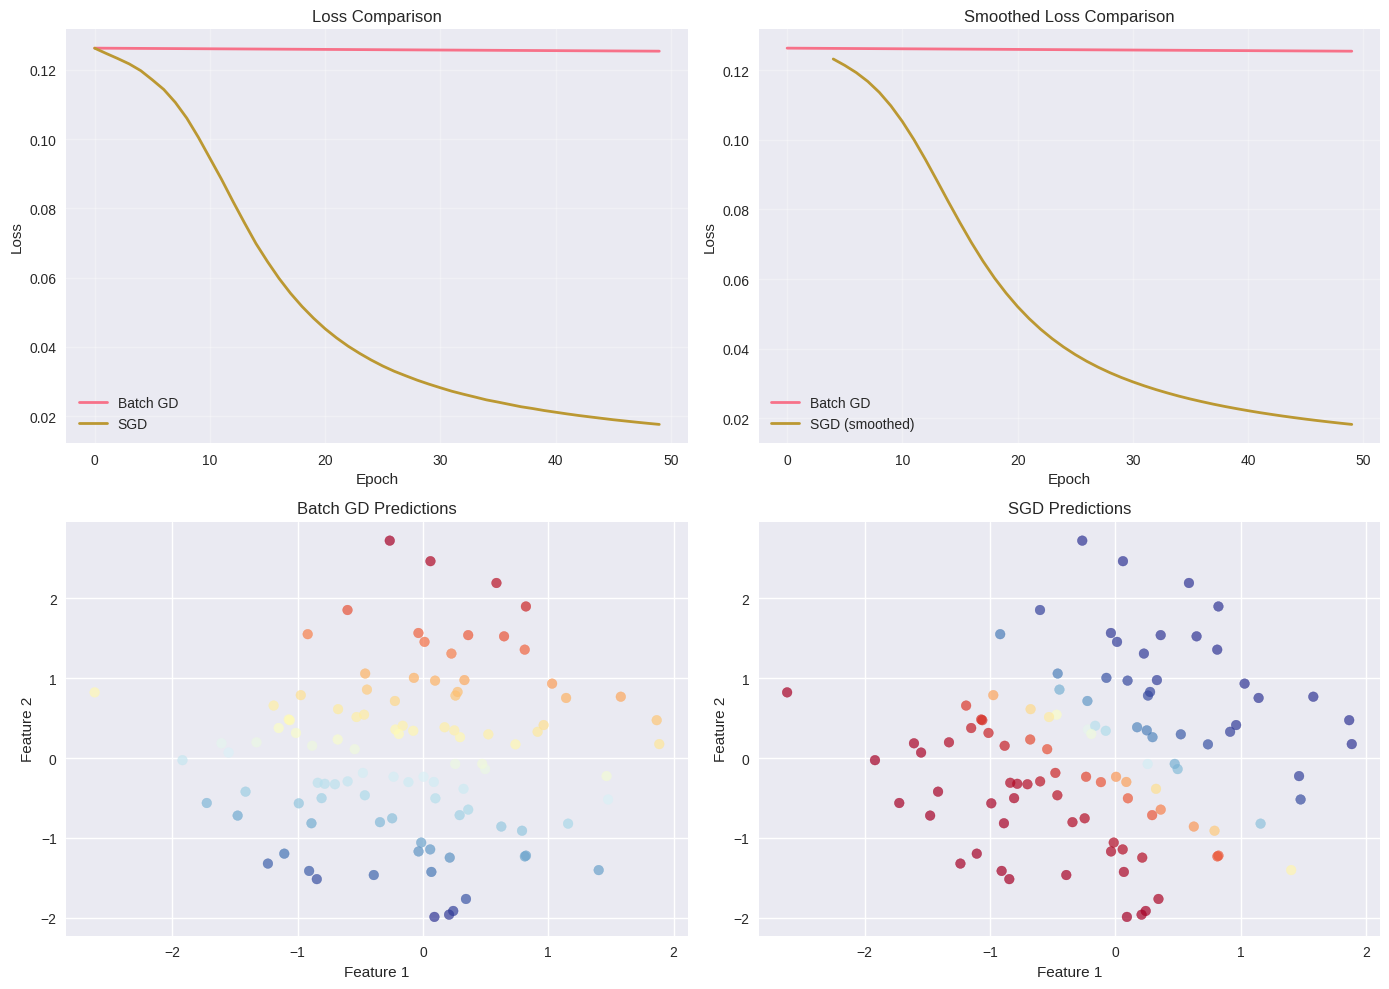

In [7]:
# Compare Batch GD vs SGD
class SGDNetwork(BackpropNetwork):
    def train_batch(self, X, y, epochs=100, learning_rate=0.1):
        losses = []
        for epoch in range(epochs):
            loss = self.backward(X, y, learning_rate)
            losses.append(loss)
        return losses

    def train_sgd(self, X, y, epochs=100, learning_rate=0.1, batch_size=1):
        losses = []
        n_samples = X.shape[0]

        for epoch in range(epochs):
            # Shuffle data
            indices = np.random.permutation(n_samples)
            epoch_losses = []

            for i in range(0, n_samples, batch_size):
                batch_indices = indices[i:i+batch_size]
                X_batch = X[batch_indices]
                y_batch = y[batch_indices]

                loss = self.backward(X_batch, y_batch, learning_rate)
                epoch_losses.append(loss)

            losses.append(np.mean(epoch_losses))

        return losses

# Train networks
sgd_net1 = SGDNetwork()  # Batch GD
sgd_net2 = SGDNetwork()  # SGD

batch_losses = sgd_net1.train_batch(X_data, y_data, epochs=50, learning_rate=0.1)
sgd_losses = sgd_net2.train_sgd(X_data, y_data, epochs=50, learning_rate=0.1, batch_size=1)

# Compare results
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 10))

# Loss comparison
ax1.plot(batch_losses, label='Batch GD', linewidth=2)
ax1.plot(sgd_losses, label='SGD', linewidth=2)
ax1.set_title('Loss Comparison')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Smoothed SGD loss
window_size = 5
sgd_smoothed = np.convolve(sgd_losses, np.ones(window_size)/window_size, mode='valid')
ax2.plot(batch_losses, label='Batch GD', linewidth=2)
ax2.plot(range(window_size-1, len(sgd_losses)), sgd_smoothed, label='SGD (smoothed)', linewidth=2)
ax2.set_title('Smoothed Loss Comparison')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Final predictions comparison
pred1 = sgd_net1.forward(X_data)
pred2 = sgd_net2.forward(X_data)

ax3.scatter(X_data[:, 0], X_data[:, 1], c=pred1.flatten(), cmap='RdYlBu', alpha=0.7)
ax3.set_title('Batch GD Predictions')
ax3.set_xlabel('Feature 1')
ax3.set_ylabel('Feature 2')

ax4.scatter(X_data[:, 0], X_data[:, 1], c=pred2.flatten(), cmap='RdYlBu', alpha=0.7)
ax4.set_title('SGD Predictions')
ax4.set_xlabel('Feature 1')
ax4.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

📊 SGD vs Batch GD Comparison:
Final Batch GD Loss:
Final SGD Loss:
Batch GD Accuracy:
SGD Accuracy:

In [8]:
print("Final Batch GD Loss: {:.6f}".format(batch_losses[-1]))
print("Final SGD Loss: {:.6f}".format(sgd_losses[-1]))
print("Batch GD Accuracy: {:.3f}".format(np.mean((pred1 > 0.5) == y_data)))
print("SGD Accuracy: {:.3f}".format(np.mean((pred2 > 0.5) == y_data)))

Final Batch GD Loss: 0.125412
Final SGD Loss: 0.017639
Batch GD Accuracy: 0.560
SGD Accuracy: 0.990


## 🎯 PART 6: COMPLETE TRAINING LOOP WITH MONITORING
***

Epoch 0: Loss = 0.1264, Accuracy = 0.560
Epoch 10: Loss = 0.1175, Accuracy = 0.650
Epoch 20: Loss = 0.0962, Accuracy = 0.900
Epoch 30: Loss = 0.0659, Accuracy = 0.950
Epoch 40: Loss = 0.0458, Accuracy = 0.980
Epoch 50: Loss = 0.0348, Accuracy = 0.990
Epoch 60: Loss = 0.0285, Accuracy = 0.990
Epoch 70: Loss = 0.0241, Accuracy = 0.990
Epoch 80: Loss = 0.0212, Accuracy = 0.990
Epoch 90: Loss = 0.0189, Accuracy = 0.990


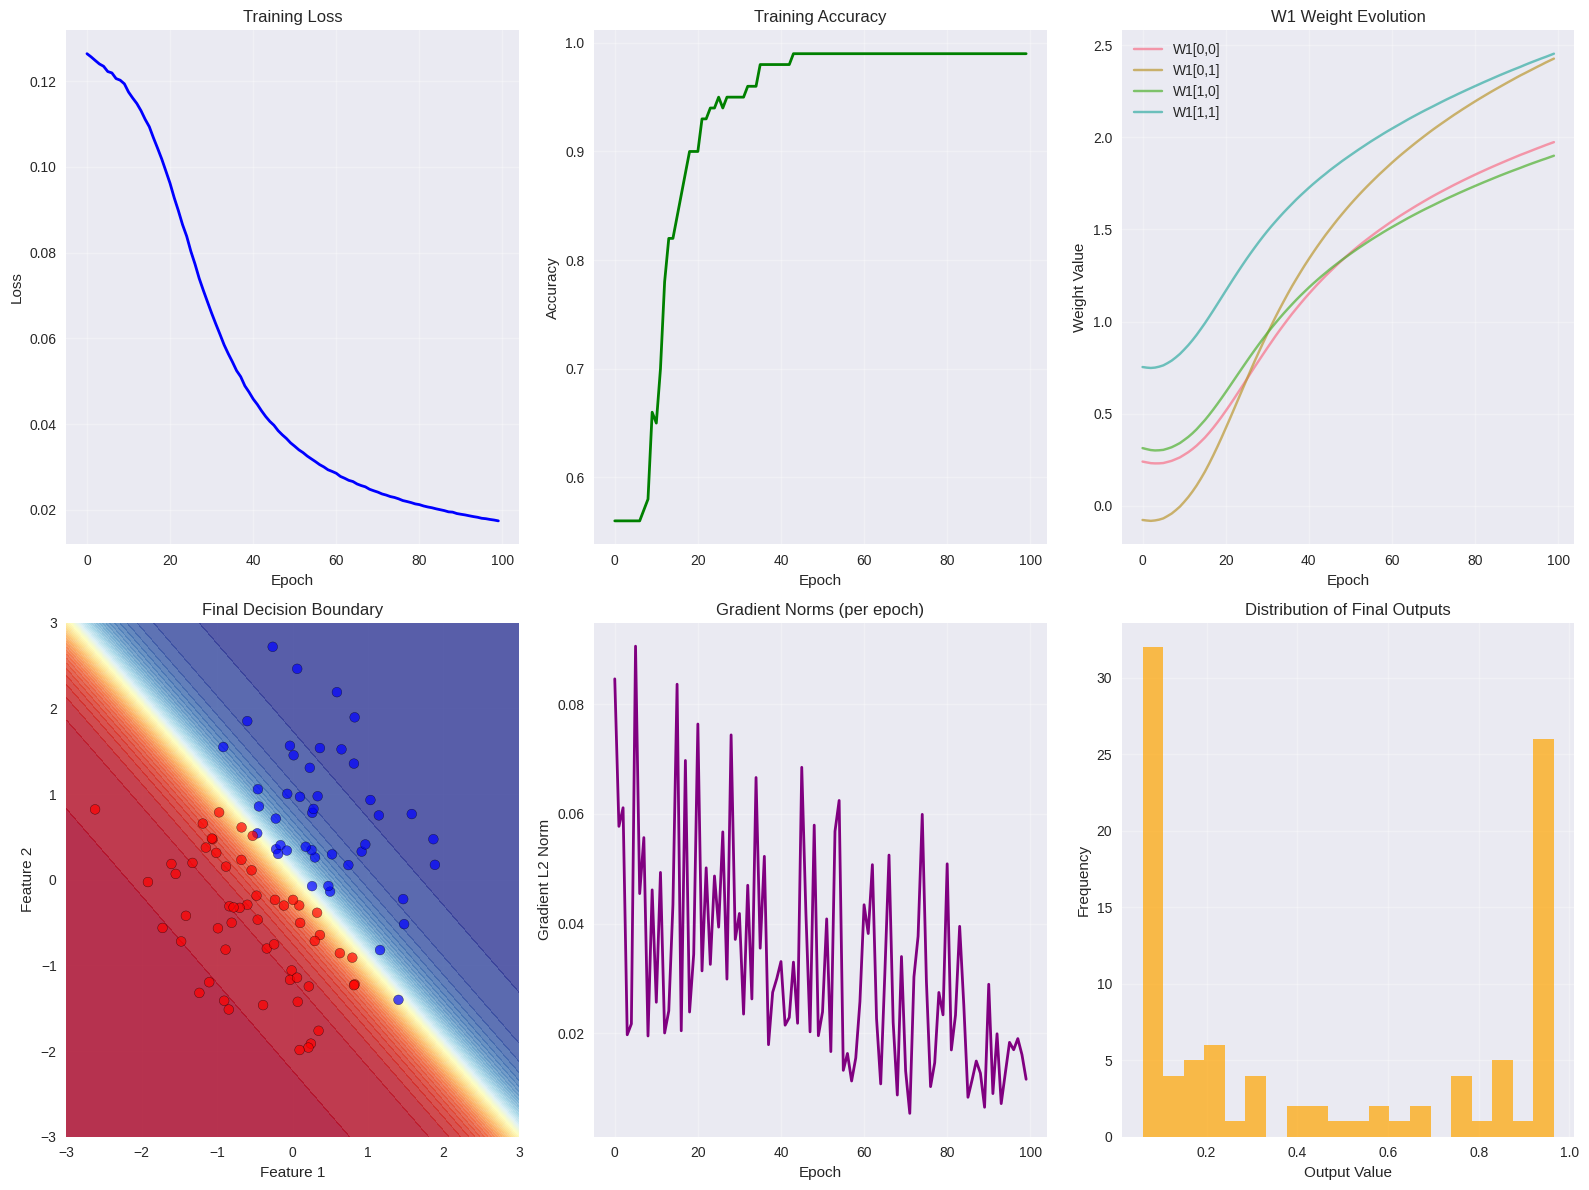

In [9]:
class MonitoredSGDNetwork(SGDNetwork):
    def __init__(self):
        super().__init__()
        self.training_history = {
            'loss': [], 'accuracy': [], 'weights': [], 'gradients': []
        }

    def train_with_monitoring(self, X, y, epochs=100, learning_rate=0.1, batch_size=10):
        n_samples = X.shape[0]

        for epoch in range(epochs):
            # Shuffle data
            indices = np.random.permutation(n_samples)
            epoch_losses = []

            for i in range(0, n_samples, batch_size):
                batch_indices = indices[i:i+batch_size]
                X_batch = X[batch_indices]
                y_batch = y[batch_indices]

                loss = self.backward(X_batch, y_batch, learning_rate)
                epoch_losses.append(loss)

            # Calculate metrics
            predictions = self.forward(X)
            accuracy = np.mean((predictions > 0.5) == y)
            avg_loss = np.mean(epoch_losses)

            # Store history
            self.training_history['loss'].append(avg_loss)
            self.training_history['accuracy'].append(accuracy)
            self.training_history['weights'].append({
                'W1': self.W1.copy(), 'b1': self.b1.copy(),
                'W2': self.W2.copy(), 'b2': self.b2.copy()
            })
            # Note: Storing gradients directly in `training_history` for plotting later might require slight modification if not already available.
            # For simplicity, if self.gradients is updated in backward, we can access it here.
            # If self.gradients holds only the last batch's gradients, it won't be epoch-level.
            # Assuming self.gradients holds the last calculated gradient for the purpose of the plot.
            if hasattr(self, 'gradients'):
                total_norm = 0
                for name in ['dL_dW1', 'dL_db1', 'dL_dW2', 'dL_db2']:
                    if name in self.gradients:
                        total_norm += np.linalg.norm(self.gradients[name])**2
                self.training_history['gradients'].append(np.sqrt(total_norm))
            else:
                 self.training_history['gradients'].append(0) # Placeholder if no gradient was calculated yet

            if epoch % 10 == 0:
                print(f"Epoch {epoch}: Loss = {avg_loss:.4f}, Accuracy = {accuracy:.3f}")

# Train the monitored network
monitored_net = MonitoredSGDNetwork()
monitored_net.train_with_monitoring(X_data, y_data, epochs=100, learning_rate=0.5, batch_size=10)

# Comprehensive visualization
fig = plt.figure(figsize=(16, 12))

# Loss and accuracy curves
ax1 = fig.add_subplot(2, 3, 1)
ax1.plot(monitored_net.training_history['loss'], 'b-', linewidth=2)
ax1.set_title('Training Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.grid(True, alpha=0.3)

ax2 = fig.add_subplot(2, 3, 2)
ax2.plot(monitored_net.training_history['accuracy'], 'g-', linewidth=2)
ax2.set_title('Training Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.grid(True, alpha=0.3)

# Weight evolution
ax3 = fig.add_subplot(2, 3, 3)
W1_evolution = [w['W1'].flatten() for w in monitored_net.training_history['weights']]
W1_evolution = np.array(W1_evolution)
for i in range(W1_evolution.shape[1]):
    ax3.plot(W1_evolution[:, i], alpha=0.7, label=f'W1[{i//2},{i%2}]')
ax3.set_title('W1 Weight Evolution')
ax3.set_xlabel('Epoch')
ax3.set_ylabel('Weight Value')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Final decision boundary
ax4 = fig.add_subplot(2, 3, 4)
xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
mesh_points = np.c_[xx.ravel(), yy.ravel()]
predictions = monitored_net.forward(mesh_points)
predictions = predictions.reshape(xx.shape)

ax4.contourf(xx, yy, predictions, levels=50, alpha=0.8, cmap='RdYlBu')

# Continue from ax4 decision boundary visualization
colors = ['red' if y == 0 else 'blue' for y in y_data.flatten()]
ax4.scatter(X_data[:, 0], X_data[:, 1], c=colors, edgecolor='black', alpha=0.7)
ax4.set_title('Final Decision Boundary')
ax4.set_xlabel('Feature 1')
ax4.set_ylabel('Feature 2')
ax4.grid(True, alpha=0.3)

# Gradient norm monitoring (optional, useful for stability)
ax5 = fig.add_subplot(2, 3, 5)
ax5.plot(monitored_net.training_history['gradients'], 'purple', linewidth=2)
ax5.set_title('Gradient Norms (per epoch)')
ax5.set_xlabel('Epoch')
ax5.set_ylabel('Gradient L2 Norm')
ax5.grid(True, alpha=0.3)

# Output histogram
ax6 = fig.add_subplot(2, 3, 6)
final_outputs = monitored_net.forward(X_data)
ax6.hist(final_outputs, bins=20, color='orange', alpha=0.7)
ax6.set_title('Distribution of Final Outputs')
ax6.set_xlabel('Output Value')
ax6.set_ylabel('Frequency')
ax6.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

✅ Training Complete
***
Final Loss:
Final Accuracy:

🧠 You've completed a full walkthrough of:
• Partial derivatives and gradients
• Gradient descent dynamics
• Forward and backward passes in a neural net
• Batch vs stochastic optimization
• Monitoring a full training loop

Try adjusting hyperparameters or expanding the model next! 🚀

In [10]:
print("Final Loss: {:.6f}".format(monitored_net.training_history['loss'][-1]))
print("Final Accuracy: {:.3f}".format(monitored_net.training_history['accuracy'][-1]))

Final Loss: 0.017408
Final Accuracy: 0.990
